In [1]:
import sys
import os
import importlib

sys.path.append(os.path.abspath('src'))
import parsing
import data_exploration

In [2]:
import SoccerNet
from SoccerNet.Downloader import SoccerNetDownloader

mySoccerNetDownloader=SoccerNetDownloader(LocalDirectory="SoccerNet")
mySoccerNetDownloader.password = "s0cc3rn3t"

# # Downloading the annotations of the 500 games
# mySoccerNetDownloader.downloadGames(files=["Labels-v2.json"], split=["train","valid","test"])

In [3]:
# # Downloading the videos of the 500 games
# mySoccerNetDownloader.downloadGames(files=["1_224p.mkv", "2_224p.mkv"], split=["train","valid","test","challenge"])

In [4]:
import pandas as pd
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 20)
pd.set_option('display.colheader_justify', 'center')

annotations_df = parsing.parse_labels_json()
annotations_engineered_df = parsing.parse_labels_json_with_feature_engineering()

display(annotations_df.head())
annotations_df.to_csv("annotations.csv", index=False)

display(annotations_engineered_df.head(100))
annotations_engineered_df.to_csv("annotations_engineered.csv", index=False)

,league,season,game_name,away_team,home_team,date,score,url_local,url_youtube,game_time,label,position,team,visibility
0,england_epl,2014-2015,2015-02-21 - 18-00 Chelsea 1 - 1 Burnley,Burnley,Chelsea,21/02/2015 - 18:00,1 - 1,england_epl/2014-2015/2015-02-21 - 18-00 Chels...,,1 - 00:00,Kick-off,0,away,visible
1,england_epl,2014-2015,2015-02-21 - 18-00 Chelsea 1 - 1 Burnley,Burnley,Chelsea,21/02/2015 - 18:00,1 - 1,england_epl/2014-2015/2015-02-21 - 18-00 Chels...,,1 - 02:13,Ball out of play,133295,not applicable,visible
2,england_epl,2014-2015,2015-02-21 - 18-00 Chelsea 1 - 1 Burnley,Burnley,Chelsea,21/02/2015 - 18:00,1 - 1,england_epl/2014-2015/2015-02-21 - 18-00 Chels...,,1 - 02:29,Throw-in,149168,away,visible
3,england_epl,2014-2015,2015-02-21 - 18-00 Chelsea 1 - 1 Burnley,Burnley,Chelsea,21/02/2015 - 18:00,1 - 1,england_epl/2014-2015/2015-02-21 - 18-00 Chels...,,1 - 02:36,Ball out of play,156098,not applicable,visible
4,england_epl,2014-2015,2015-02-21 - 18-00 Chelsea 1 - 1 Burnley,Burnley,Chelsea,21/02/2015 - 18:00,1 - 1,england_epl/2014-2015/2015-02-21 - 18-00 Chels...,,1 - 03:02,Corner,182775,away,visible


,game_id,annotation_id,away_team,home_team,date,hour,home_goals,away_goals,time,first_half,second_half,league_england_epl,label_Kick-off,is_away,is_home,team_unknown,visibility,label_Ball out of play,label_Throw-in,label_Corner,label_Shots on target,label_Offside,label_Shots off target,label_Clearance,label_Goal,label_Foul,label_Yellow card,label_Indirect free-kick,label_Direct free-kick,label_Substitution,label_Red card,label_Penalty,label_Yellow->red card,league_europe_uefa-champions-league,league_france_ligue-1,league_germany_bundesliga,league_italy_serie-a,league_spain_laliga
0,0,0,Burnley,Chelsea,21/02/2015,18:00,1,1,00:00,1,0,1.0,1.0,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,Burnley,Chelsea,21/02/2015,18:00,1,1,02:13,1,0,1.0,0.0,0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,2,Burnley,Chelsea,21/02/2015,18:00,1,1,02:29,1,0,1.0,0.0,1,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,3,Burnley,Chelsea,21/02/2015,18:00,1,1,02:36,1,0,1.0,0.0,0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,4,Burnley,Chelsea,21/02/2015,18:00,1,1,03:02,1,0,1.0,0.0,1,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,95,Burnley,Chelsea,21/02/2015,18:00,1,1,44:14,1,0,1.0,0.0,0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0,96,Burnley,Chelsea,21/02/2015,18:00,1,1,44:49,1,0,1.0,0.0,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0,97,Burnley,Chelsea,21/02/2015,18:00,1,1,00:00,0,1,1.0,1.0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0,98,Burnley,Chelsea,21/02/2015,18:00,1,1,00:27,0,1,1.0,0.0,0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
print("Number of rows:", annotations_engineered_df.shape[0])
print("Number of columns:", annotations_engineered_df.shape[1])

Number of rows: 110458
Number of columns: 38


In [6]:
print("DataFrame Info:")
print(annotations_engineered_df.info())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110458 entries, 0 to 110457
Data columns (total 38 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   game_id                              110458 non-null  int64  
 1   annotation_id                        110458 non-null  int64  
 2   away_team                            110458 non-null  object 
 3   home_team                            110458 non-null  object 
 4   date                                 110458 non-null  object 
 5   hour                                 110458 non-null  object 
 6   home_goals                           110458 non-null  int64  
 7   away_goals                           110458 non-null  int64  
 8   time                                 110458 non-null  object 
 9   first_half                           110458 non-null  int64  
 10  second_half                          110458 non-null  int64  
 1

In [7]:
print("Missing Values per Column:")
print(annotations_engineered_df.isnull().sum())


Missing Values per Column:
game_id                                0
annotation_id                          0
away_team                              0
home_team                              0
date                                   0
                                      ..
league_europe_uefa-champions-league    0
league_france_ligue-1                  0
league_germany_bundesliga              0
league_italy_serie-a                   0
league_spain_laliga                    0
Length: 38, dtype: int64


In [8]:
print("Descriptive Statistics (Including Non-Numerical):")
display(annotations_engineered_df.describe(include='all'))

Descriptive Statistics (Including Non-Numerical):


,game_id,annotation_id,away_team,home_team,date,hour,home_goals,away_goals,time,first_half,second_half,league_england_epl,label_Kick-off,is_away,is_home,team_unknown,visibility,label_Ball out of play,label_Throw-in,label_Corner,label_Shots on target,label_Offside,label_Shots off target,label_Clearance,label_Goal,label_Foul,label_Yellow card,label_Indirect free-kick,label_Direct free-kick,label_Substitution,label_Red card,label_Penalty,label_Yellow->red card,league_europe_uefa-champions-league,league_france_ligue-1,league_germany_bundesliga,league_italy_serie-a,league_spain_laliga
count,110458.000000,110458.000000,110458,110458,110458,110458,110458.000000,110458.000000,110458,110458.000000,110458.000000,110458.000000,110458.000000,110458.000000,110458.000000,110458.000000,110458.000000,110458.000000,110458.000000,110458.000000,110458.000000,110458.000000,110458.000000,110458.000000,110458.000000,110458.000000,110458.000000,110458.000000,110458.000000,110458.000000,110458.000000,110458.000000,110458.000000,110458.000000,110458.000000,110458.000000,110458.000000,110458.000000
unique,NaN,NaN,114,125,217,32,NaN,NaN,3048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Real Madrid,Real Madrid,26/09/2015,21:45,NaN,NaN,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,9271,10507,2097,20957,NaN,NaN,1097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,20.885069,111.736886,NaN,NaN,NaN,NaN,1.855954,1.414067,NaN,0.482600,0.517400,0.185057,0.023231,0.350749,0.361269,0.287983,0.821860,0.287983,0.171269,0.043781,0.052690,0.018994,0.047584,0.071484,0.015418,0.105687,0.018532,0.095249,0.019917,0.025702,0.000498,0.001566,0.000416,0.200330,0.069492,0.111481,0.201968,0.231672
std,16.894760,66.718012,NaN,NaN,NaN,NaN,1.591305,1.383455,NaN,0.499699,0.499699,0.388345,0.150636,0.477207,0.480370,0.452825,0.382632,0.452825,0.376745,0.204609,0.223414,0.136503,0.212885,0.257633,0.123207,0.307438,0.134865,0.293560,0.139716,0.158246,0.022309,0.039544,0.020403,0.400249,0.254291,0.314729,0.401470,0.421902
min,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,55.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17.000000,110.000000,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,165.000000,NaN,NaN,NaN,NaN,3.000000,2.000000,NaN,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [9]:
# Number of unique labels (excluding game-related columns)
label_columns = [col for col in annotations_engineered_df.columns if col.startswith('label_')]
unique_labels = len(label_columns)
print("Number of unique labels:", unique_labels)

# List of unique labels (based on the column names)
print("Unique labels:", label_columns)


Number of unique labels: 17
Unique labels: ['label_Kick-off', 'label_Ball out of play', 'label_Throw-in', 'label_Corner', 'label_Shots on target', 'label_Offside', 'label_Shots off target', 'label_Clearance', 'label_Goal', 'label_Foul', 'label_Yellow card', 'label_Indirect free-kick', 'label_Direct free-kick', 'label_Substitution', 'label_Red card', 'label_Penalty', 'label_Yellow->red card']


c:\Users\justi\Documents\TRAVAIL\Porto\Deep Learning\TAAC_project\src\data_exploration.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_distribution_sorted.index, y=label_distribution_sorted.values, palette="viridis")


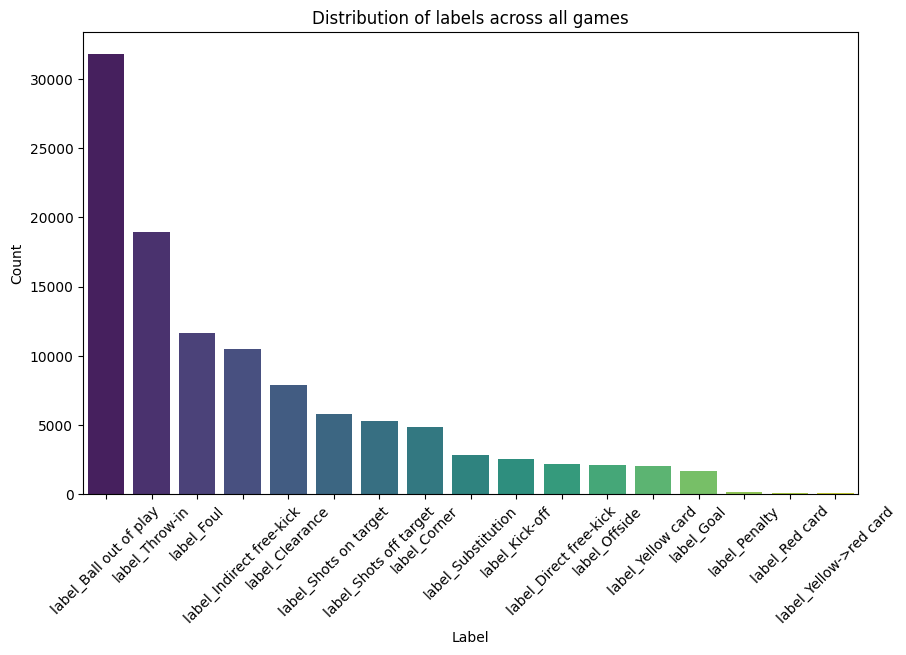

In [10]:
data_exploration.print_labels_distribution(annotations_engineered_df)

c:\Users\justi\Documents\TRAVAIL\Porto\Deep Learning\TAAC_project\src\data_exploration.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_label_freq_sorted.index, y=avg_label_freq_sorted.values, palette="viridis")


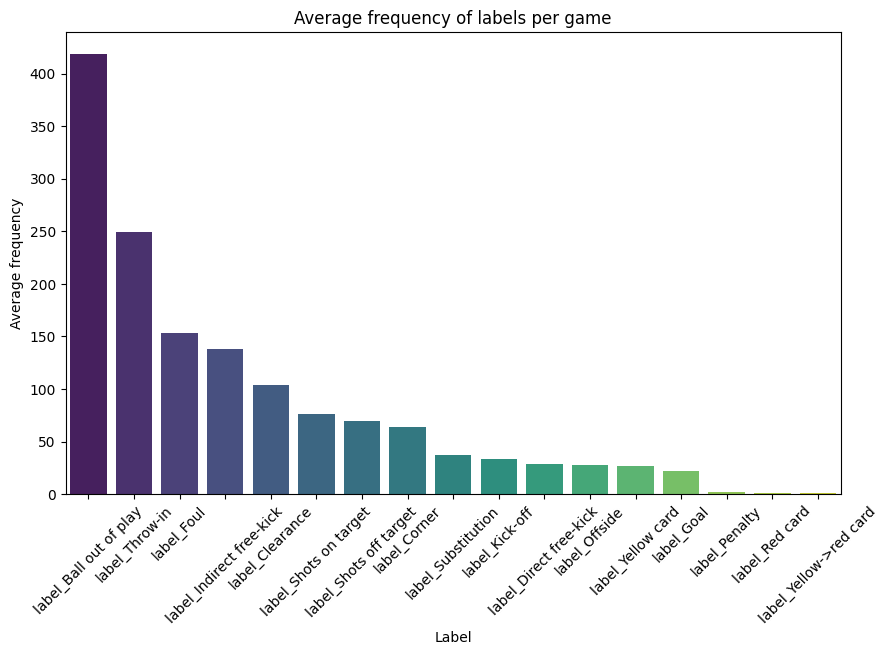

In [11]:
data_exploration.print_labels_frequency(annotations_engineered_df)

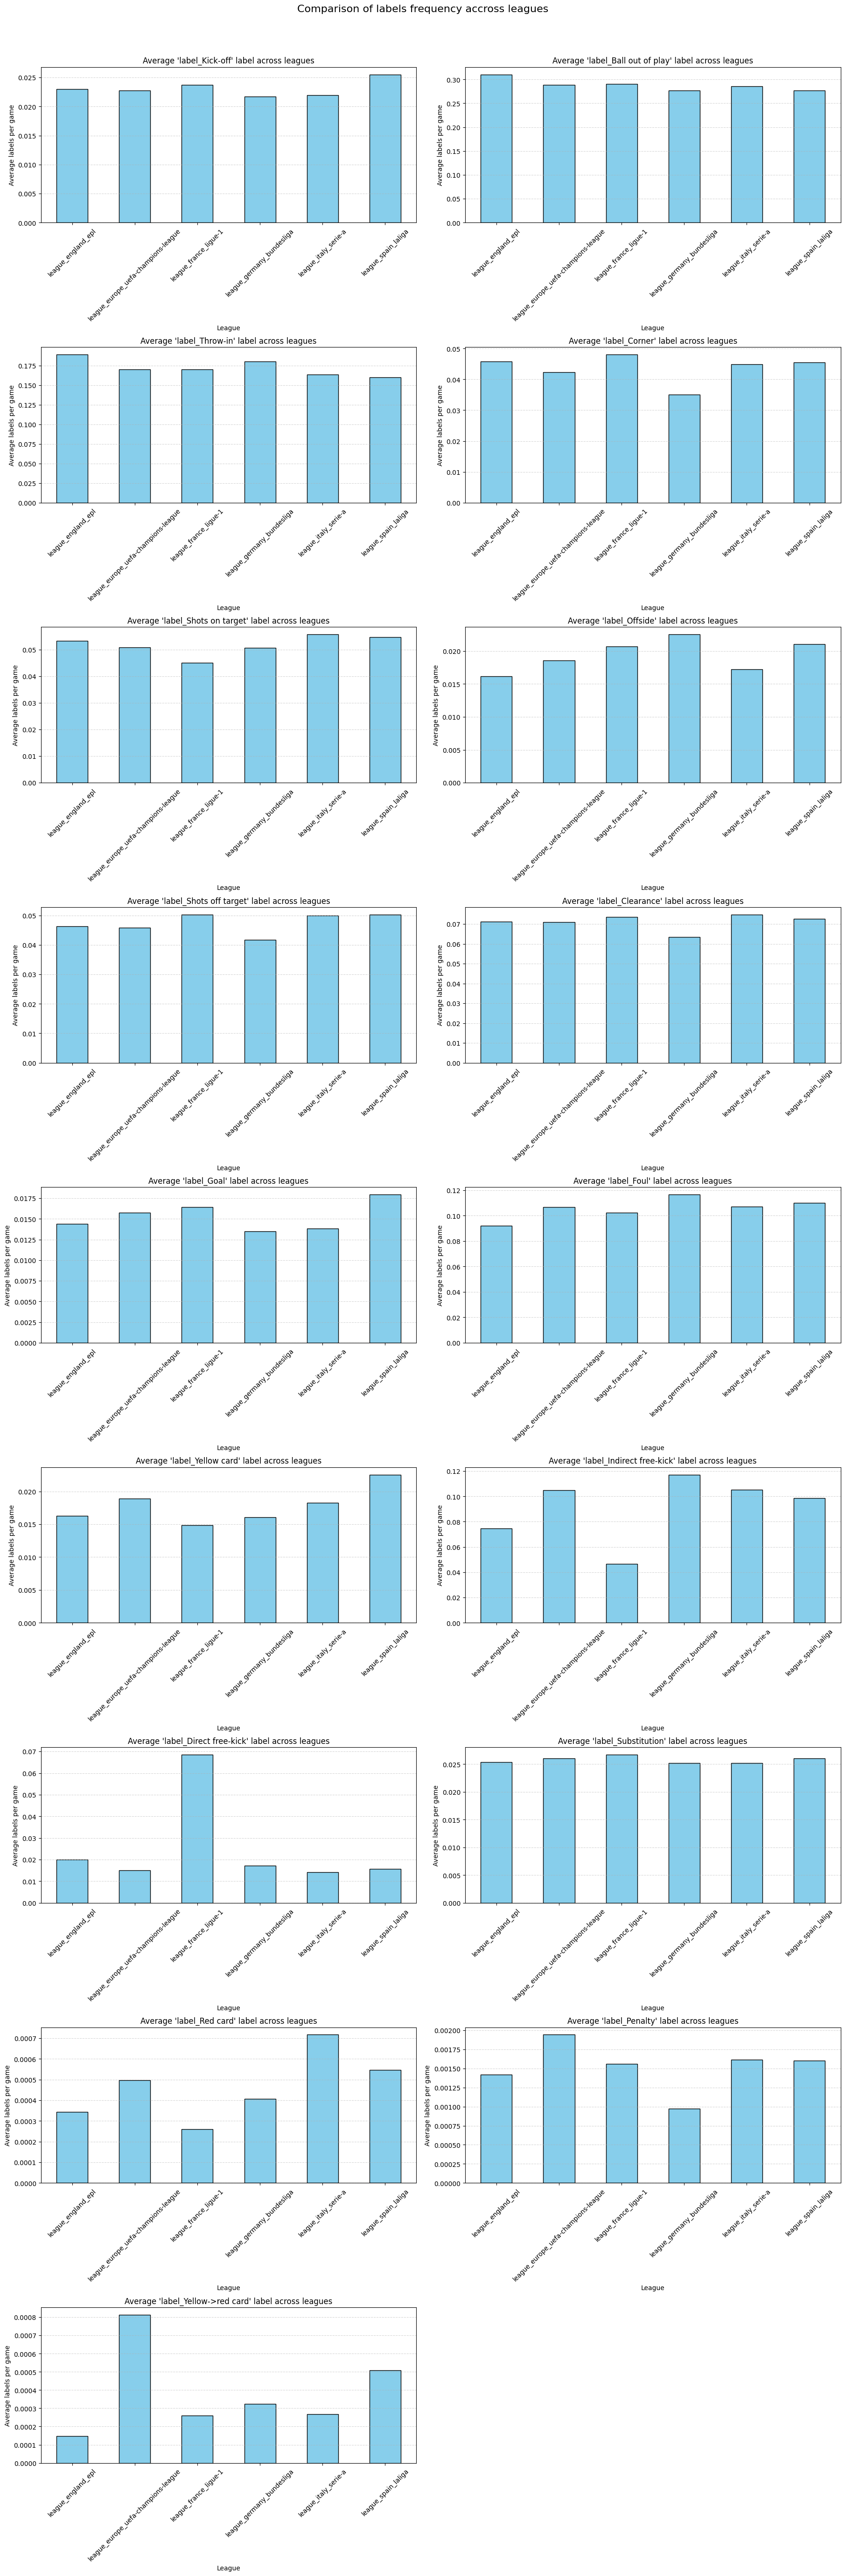

In [12]:
data_exploration.print_labels_frequency_per_league(annotations_engineered_df)

<Figure size 1200x800 with 0 Axes>

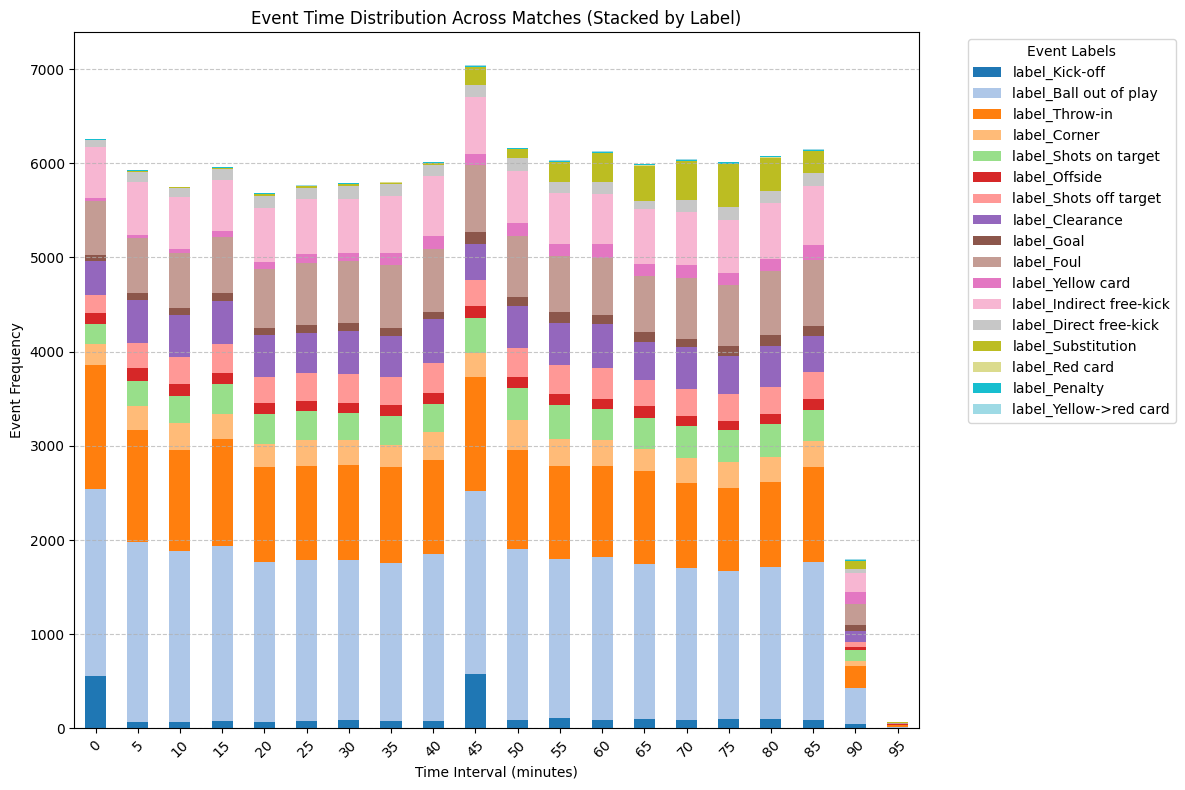

In [13]:
data_exploration.print_labels_distribution_over_game_intervals(annotations_engineered_df)